**dbscan clustering**

In [112]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [113]:
wholesale_data=pd.read_csv("/content/Wholesale customers data.csv")
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [114]:
scaler=StandardScaler()

In [115]:
scaled_data=scaler.fit_transform(wholesale_data)

In [116]:
scaled_data_1=pd.DataFrame(scaled_data)

In [117]:
scaled_data_1

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [118]:
scaled_data_1.drop([0,1],axis=1,inplace=True)

In [119]:
scaled_data_1.columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [120]:
scaled_data_1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [121]:
dbscan=DBSCAN(eps=3,min_samples=3)
clusters=dbscan.fit_predict(scaled_data_1)
clusters=pd.DataFrame(clusters,columns=['clusterid'])

In [122]:
clusters

,clusterid
0,0
1,0
2,0
3,0
4,0
...,...
435,0
436,0
437,0
438,0


In [123]:
finall_data=pd.concat([wholesale_data,clusters],axis=1)

In [124]:
finall_data = finall_data.drop(finall_data[finall_data.clusterid == -1].index, axis=0)


In [125]:
finall_data.drop(labels=['clusterid'],axis=1,inplace=True)

In [126]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(finall_data)
  wcss.append(kmeans.inertia_)

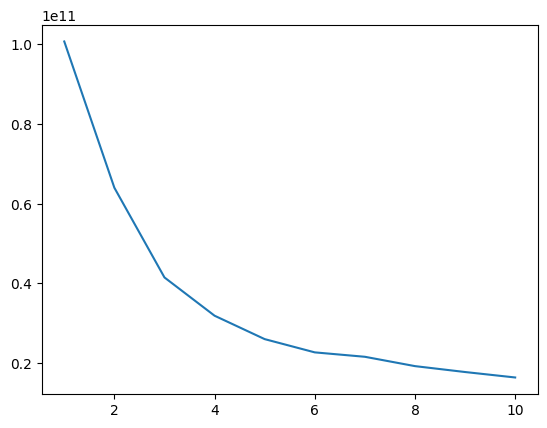

In [127]:
plt.plot(range(1,11),wcss)

In [128]:
kmean_cluster=KMeans(n_clusters=3,random_state=42)
cluster=kmean_cluster.fit_predict(finall_data)

In [129]:
clusters=pd.DataFrame(cluster,columns=['clustersid'])

In [130]:
finall_data['cluster_id']=clusters

In [136]:
finall_data.drop(labels=['cluster_id'],axis=1,inplace=True)

In [140]:
finall_data.reset_index(inplace=True)

In [144]:
final_data=pd.concat([finall_data,clusters],axis=1)

In [145]:
final_data.isna().sum()

,0
index,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
clustersid,0


In [147]:
final_data.value_counts('clustersid')

,count
clustersid,
0,274
2,81
1,73


In [148]:
final_data.sort_values(by='clustersid')

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clustersid
0,0,2,3,12669,9656,7561,214,2674,1338,0
262,272,1,1,514,8323,6869,529,93,1040,0
261,271,1,1,2083,5007,1563,1120,147,1550,0
260,270,1,1,4720,1032,975,5500,197,56,0
259,269,1,1,15218,258,1138,2516,333,204,0
...,...,...,...,...,...,...,...,...,...,...
291,301,2,2,5283,13316,20399,1809,8752,172,2
92,100,2,3,11594,7779,12144,3252,8035,3029,2
93,101,2,3,1420,10810,16267,1593,6766,1838,2
98,106,2,3,1454,6337,10704,133,6830,1831,2


In [151]:
final_data[final_data.clustersid==1]

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clustersid
4,4,2,3,22615,5410,7198,3915,1777,5185,1
12,12,2,3,31714,12319,11757,287,3881,2931,1
13,13,2,3,21217,6208,14982,3095,6707,602,1
14,14,2,3,24653,9465,12091,294,5058,2168,1
22,22,1,3,31276,1917,4469,9408,2381,4334,1
...,...,...,...,...,...,...,...,...,...,...
410,422,1,3,26400,1377,4172,830,948,1218,1
415,427,1,3,31012,16687,5429,15082,439,1163,1
420,432,1,3,21117,1162,4754,269,1328,395,1
423,435,1,3,29703,12051,16027,13135,182,2204,1


In [152]:
final_data[final_data.clustersid==2]

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clustersid
9,9,2,3,6006,11093,18881,1159,7425,2098,2
10,10,2,3,3366,5403,12974,4400,5977,1744,2
16,16,2,3,1020,8816,12121,134,4508,1080,2
27,28,2,3,4113,20484,25957,1158,8604,5206,2
36,37,2,3,15168,10556,12477,1920,6506,714,2
...,...,...,...,...,...,...,...,...,...,...
406,418,2,3,660,8494,18622,133,6740,776,2
408,420,1,3,4456,5266,13227,25,6818,1393,2
414,426,1,3,13134,9347,14316,3141,5079,1894,2
418,430,1,3,3097,4230,16483,575,241,2080,2


In [153]:
final_data[final_data.clustersid==0]

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clustersid
0,0,2,3,12669,9656,7561,214,2674,1338,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0
3,3,1,3,13265,1196,4221,6404,507,1788,0
5,5,2,3,9413,8259,5126,666,1795,1451,0
...,...,...,...,...,...,...,...,...,...,...
419,431,1,3,8533,5506,5160,13486,1377,1498,0
421,433,1,3,1982,3218,1493,1541,356,1449,0
422,434,1,3,16731,3922,7994,688,2371,838,0
426,438,1,3,10290,1981,2232,1038,168,2125,0
